<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/OtherMethodsV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.2 MB/s eta 0:00:00
   ━━━━

In [1]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)

In [2]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [3]:
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [ ]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


# **Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.873
Precision: 0.625
Recall: 0.11278195488721804


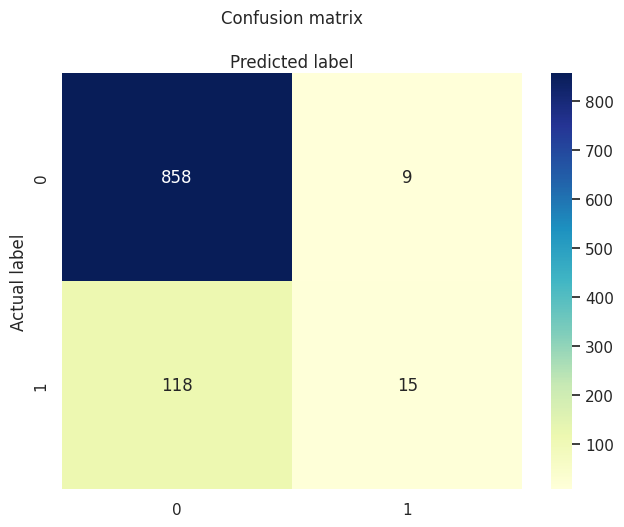

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
eval(y_test,y_pred)

In [ ]:
#To get the coeffient
!pip install statsmodels
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X2)
result=logit_model.fit()
print(result.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.3 MB/s eta 0:00:00
Optimization terminated successfully.
         Current function value: 0.330509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2314
Method:                           MLE   Df Model:                           18
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.2182
Time:                        08:03:47   Log-Likelihood:                -771.08
converged:                       True   LL-Null:                       -986.27
Covariance Type:            nonrobust   LLR p-value:                 4.144e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------

A) Which variables are significantly diffrent than 0  at 5% significant level?

Hypothesis  HO: Coeffienct is 0
            HA: Coeffient is different than 0
If alpha is smaller than significance level(5%), reject Ho and coeffient is different than 0.
If alpha is grater than significance level(5%),fail to reject Ho and
coeffient is not different than 0.

International plan , voice mail plan, Total intl calls, Customer service calls
have alpha value less than 0.05. For that resaon, coeffient is different than 0.


B)Among signicant variables, which one increases the probability of churn?

   ln(p/(1-p))=B+B1X1+B2X2+B3X3
   p is probability of success(1). In our case 1 is churn.
   If coeffient is positive(negative), it increases(decreases) the likelihood ratio and churn probability.
   International plan , voice mail plan,Customer service calls (Total intl calls) have positive(negative coeffient) and it increases(decreases) likelihood of churn.


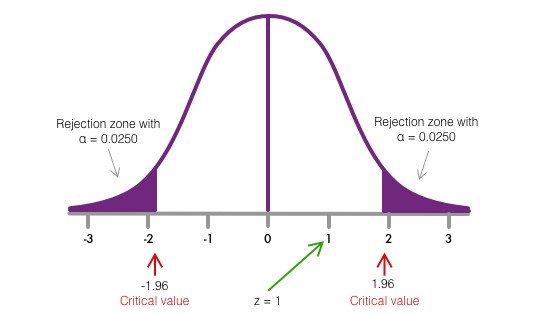

## **K-Nearest Neighbour- kNN**

Accuracy: 0.875
Precision: 0.58
Recall: 0.21804511278195488


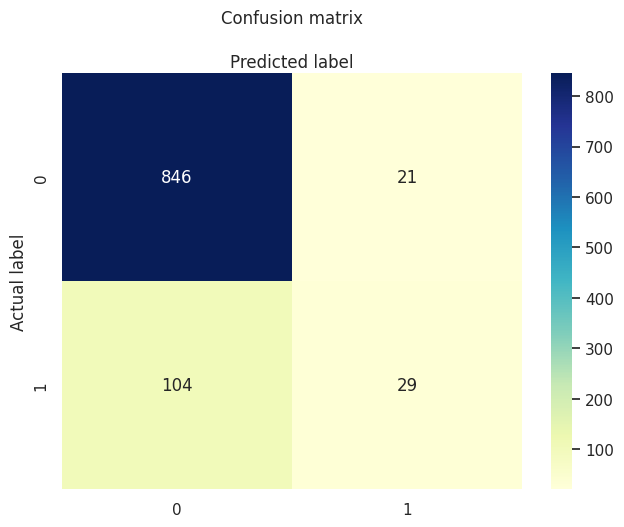

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier()
# fit the model with data
knn3.fit(X_train,y_train)

#
y_predKNN3=knn3.predict(X_test)
from sklearn import metrics

eval(y_test,y_predKNN3)

## **Choose k Based On CV**

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_params = {"n_neighbors": range(1,20)}

knn_grid = GridSearchCV(knn, knn_params, cv=3)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_

CPU times: user 5.47 s, sys: 107 ms, total: 5.58 s
Wall time: 2.22 s


{'n_neighbors': 11}

Accuracy: 0.883
Precision: 0.7222222222222222
Recall: 0.19548872180451127


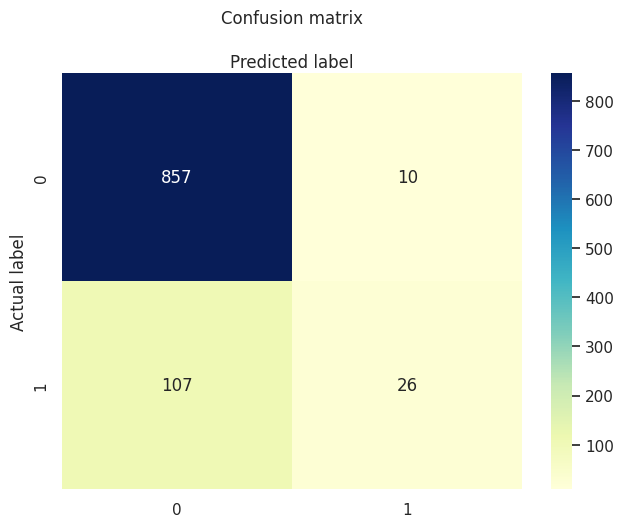

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knncv = KNeighborsClassifier(**knn_grid.best_params_)
# fit the model with data
knncv.fit(X_train,y_train)
#
y_predknncv=knncv.predict(X_test)
eval(y_test,y_predknncv)


# **Naive Bayes**

Accuracy: 0.863
Precision: 0.4864864864864865
Recall: 0.5413533834586466


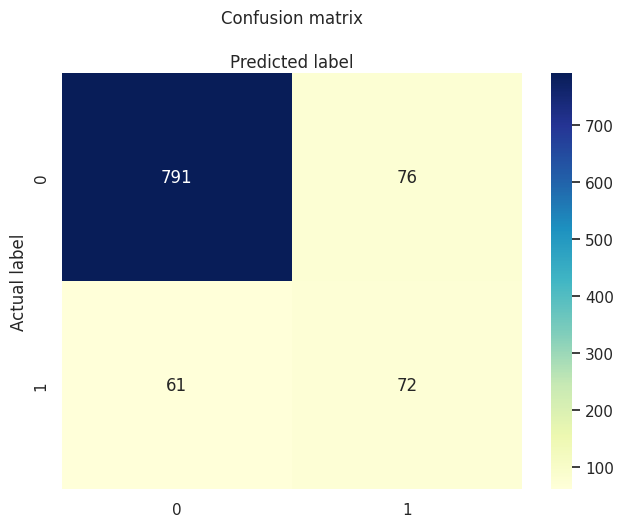

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
y_predNB=model.predict(X_test)
eval(y_test,y_predNB)

# **SVM with default parameters**

Accuracy: 0.867
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


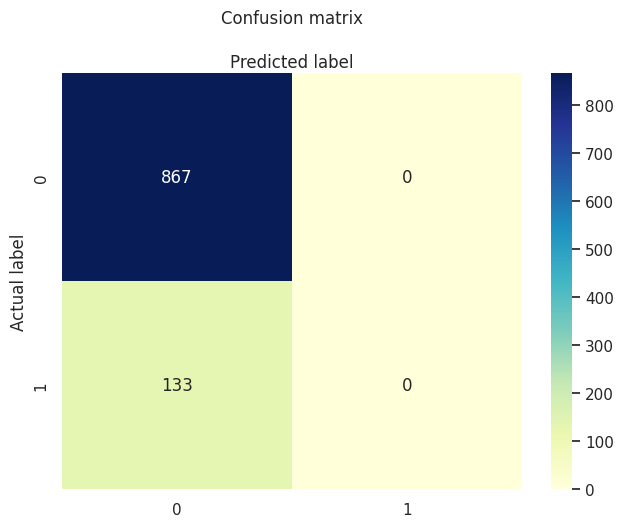

In [ ]:
from sklearn.svm import SVC
sv =SVC()
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

# Neural Network

Accuracy: 0.885
Precision: 0.7368421052631579
Recall: 0.21052631578947367


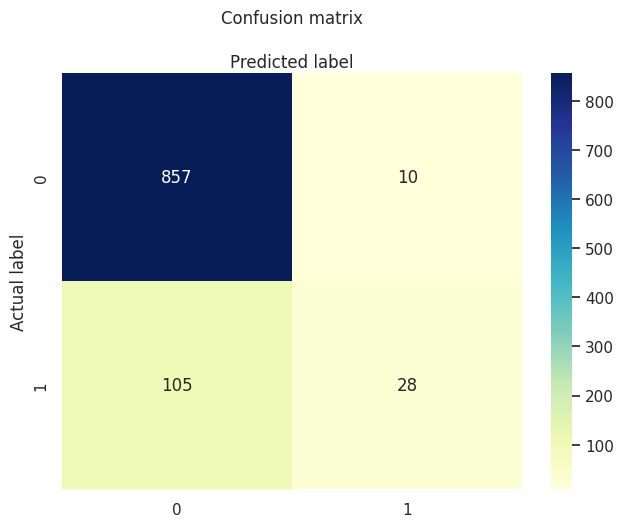

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=17, max_iter=300).fit(X_train, y_train)
y_pred_nn=clf.predict(X_test)

from sklearn import metrics

eval(y_test,y_pred_nn)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 41.4 MB/s eta 0:00:00


### **Support Vector with Parameter Optimization**

It takes too much time to optimize

In [ ]:
from sklearn.svm import SVC
import optuna as op
from sklearn.metrics import accuracy_score
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train, y_train, test_size=0.3, random_state=17
)
def objective(trial):

   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.1,3.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVC(kernel=kernel,gamma=gamma,degree=degree,C=c)
   model.fit(X_train2,y_train2)
   accuracy = accuracy_score(model.predict(X_test2),y_test2)
   return accuracy
#optuna study record
study = op.create_study(direction="maximize")
study.optimize(objective, n_trials=5,n_jobs=-1)
print(study.best_trials)

[I 2023-03-30 03:53:16,850] A new study created in memory with name: no-name-27af9730-f40c-4d5b-8cca-79e324a235cb
[I 2023-03-30 03:53:17,220] Trial 1 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.32164244367819006, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,011] Trial 2 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.39402154474980317, 'gamma': 'auto', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,187] Trial 3 finished with value: 0.8528571428571429 and parameters: {'kernel': 'sigmoid', 'C': 0.10482982035014193, 'gamma': 'auto', 'degree': 3}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30 03:53:18,563] Trial 4 finished with value: 0.8528571428571429 and parameters: {'kernel': 'rbf', 'C': 1.0458944777779748, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.8528571428571429.
[I 2023-03-30

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.8528571428571429], datetime_start=datetime.datetime(2023, 3, 30, 3, 53, 16, 860476), datetime_complete=datetime.datetime(2023, 3, 30, 3, 54, 30, 952932), params={'kernel': 'linear', 'C': 1.1850790159628448, 'gamma': 'auto', 'degree': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('rbf', 'poly', 'linear', 'sigmoid')), 'C': FloatDistribution(high=3.0, log=True, low=0.1, step=None), 'gamma': CategoricalDistribution(choices=('auto', 'scale')), 'degree': IntDistribution(high=3, log=True, low=1, step=1)}, trial_id=0, value=None), FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.8528571428571429], datetime_start=datetime.datetime(2023, 3, 30, 3, 53, 16, 873252), datetime_complete=datetime.datetime(2023, 3, 30, 3, 53, 17, 220316), params={'kernel': 'sigmoid', 'C': 0.32164244367819006, 'gamma': 'scale', 'degree': 1}, user_attrs={}, system_attrs={}, interme

In [ ]:
print(study.best_params)

{'kernel': 'linear', 'C': 2.797224576635671, 'gamma': 'scale', 'degree': 3}


Accuracy: 0.878
Precision: 0.6341463414634146
Recall: 0.19548872180451127


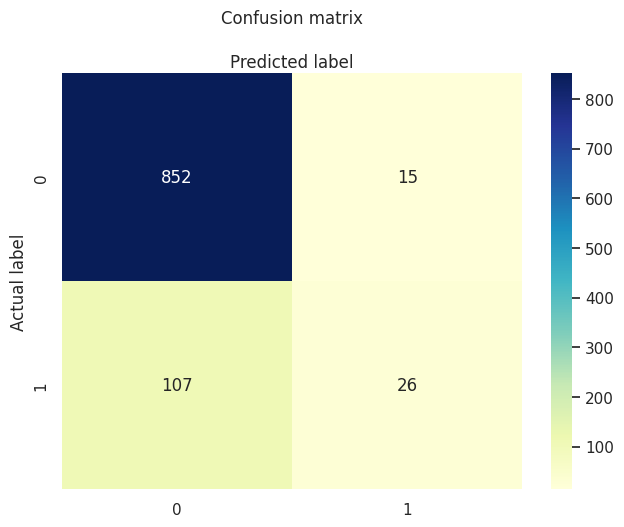

In [ ]:
parameters={'kernel': 'linear', 'C': 2.797224576635671, 'gamma': 'scale', 'degree': 3}
from sklearn.svm import SVC
sv =SVC(**parameters)
sv.fit(X_train,y_train)
y_predsv=sv.predict(X_test)
from sklearn import metrics

eval(y_test,y_predsv)

## **Boosting**

In [ ]:
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.0 MB/s eta 0:00:00


In [ ]:
import optuna

import sklearn.datasets
import sklearn.ensemble

# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):

    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.RandomForestClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = XGBClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = lgb.LGBMClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    else:
         max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
         max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(random_state=17,  max_depth=max_depth, max_features=max_features )



    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()

    return accuracy


if __name__ == "__main__":
    l1=0
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=40)
    print(study.best_trial)
    print(study.best_params)

[I 2025-04-02 08:12:51,372] A new study created in memory with name: no-name-dce795ad-a441-4f92-b060-55f48babb482
[I 2025-04-02 08:12:51,582] Trial 0 finished with value: 0.9434188135987621 and parameters: {'classifier': 'LightGBM', 'max_depth': 5, 'max_features': 4}. Best is trial 0 with value: 0.9434188135987621.
[I 2025-04-02 08:12:52,877] Trial 1 finished with value: 0.9438494682710621 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 6, 'max_features': 18}. Best is trial 1 with value: 0.9438494682710621.
[I 2025-04-02 08:12:53,016] Trial 2 finished with value: 0.9489952677613346 and parameters: {'classifier': 'XGBoost', 'max_depth': 15, 'max_features': 10}. Best is trial 2 with value: 0.9489952677613346.
[I 2025-04-02 08:12:55,397] Trial 3 finished with value: 0.9417039147116268 and parameters: {'classifier': 'GradientBoostingClassifier', 'max_depth': 12, 'max_features': 15}. Best is trial 2 with value: 0.9489952677613346.
[I 2025-04-02 08:12:57,871] Trial 

FrozenTrial(number=30, state=1, values=[0.9532819635647399], datetime_start=datetime.datetime(2025, 4, 2, 8, 13, 12, 513656), datetime_complete=datetime.datetime(2025, 4, 2, 8, 13, 12, 999093), params={'classifier': 'LightGBM', 'max_depth': 16, 'max_features': 5}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=18, log=False, low=2, step=1), 'max_features': IntDistribution(high=18, log=False, low=2, step=1)}, trial_id=30, value=None)
{'classifier': 'LightGBM', 'max_depth': 16, 'max_features': 5}


In [ ]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         rf_params = {
            "random_state": 17,
            "max_depth": trial.suggest_categorical("max_depth", [3, 6, 9, 12, 15]),
            "max_features": trial.suggest_categorical("max_features", [3, 6, 9, 12, 15])
         }
         classifier_obj = sklearn.ensemble.RandomForestClassifier(**rf_params)



    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         xgb_params ={
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.05, 0.1, 0.3]),
        "max_depth": trial.suggest_categorical("max_depth", [3, 6, 9, 12, 15]),
        "random_state": 17
        }
         classifier_obj = XGBClassifier(**xgb_params)



    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         lgb_params = {
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.05, 0.1, 0.3]),
        "max_depth": trial.suggest_categorical("max_depth", [3, 6, 9, 12, 15]),
        "random_state": 17
        }

         classifier_obj = lgb.LGBMClassifier(**lgb_params)



    else:
         gb_params = {
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.05, 0.1, 0.3]),
        "max_depth": trial.suggest_categorical("max_depth", [3, 6, 9, 12, 15]),
        "random_state": 17
        }
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(**gb_params)



    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)
    print(study.best_trial)

[I 2025-04-02 08:16:08,270] A new study created in memory with name: no-name-b89be633-7975-44ef-82f4-724d2208b944
[I 2025-04-02 08:16:11,447] Trial 0 finished with value: 0.9172740496647952 and parameters: {'classifier': 'GradientBoostingClassifier', 'learning_rate': 0.1, 'max_depth': 15}. Best is trial 0 with value: 0.9172740496647952.
[I 2025-04-02 08:16:14,031] Trial 1 finished with value: 0.935274973835385 and parameters: {'classifier': 'GradientBoostingClassifier', 'learning_rate': 0.1, 'max_depth': 12}. Best is trial 1 with value: 0.935274973835385.
[I 2025-04-02 08:16:16,472] Trial 2 finished with value: 0.9339885239628171 and parameters: {'classifier': 'GradientBoostingClassifier', 'learning_rate': 0.05, 'max_depth': 12}. Best is trial 1 with value: 0.935274973835385.
[I 2025-04-02 08:16:17,216] Trial 3 finished with value: 0.9425619155696277 and parameters: {'classifier': 'Random Forest', 'max_depth': 6, 'max_features': 15}. Best is trial 3 with value: 0.9425619155696277.
[I 2

FrozenTrial(number=28, state=1, values=[0.9524245141211723], datetime_start=datetime.datetime(2025, 4, 2, 8, 16, 24, 274398), datetime_complete=datetime.datetime(2025, 4, 2, 8, 16, 24, 606684), params={'classifier': 'LightGBM', 'learning_rate': 0.05, 'max_depth': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'learning_rate': CategoricalDistribution(choices=(0.001, 0.01, 0.05, 0.1, 0.3)), 'max_depth': CategoricalDistribution(choices=(3, 6, 9, 12, 15))}, trial_id=28, value=None)


In [ ]:
print(study.best_params)

{'classifier': 'LightGBM', 'learning_rate': 0.05, 'max_depth': 9}


[LightGBM] [Warning] Unknown parameter: classifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: classifier
[LightGBM] [Info] Number of positive: 350, number of negative: 1983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2363
[LightGBM] [Info] Number of data points in the train set: 2333, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150021 -> initscore=-1.734433
[LightGBM] [Info] Start training from score -1.734433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: classifier
Accuracy: 0.957
Precision: 0.9166666666666666
Recall: 0.7443609022556391


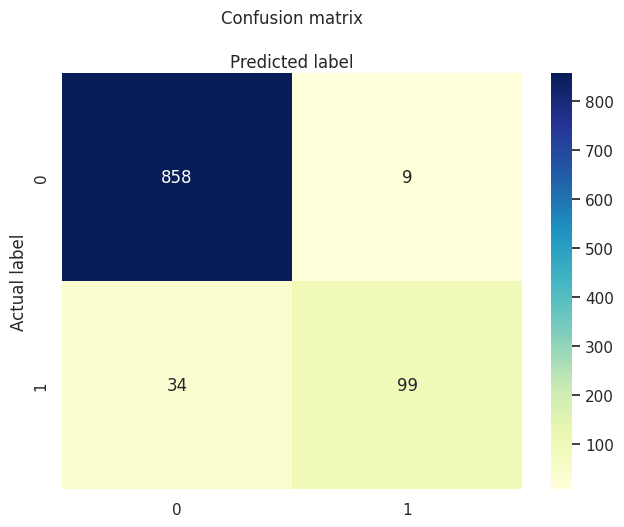

In [ ]:

import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=17,**study.best_params)
lgbm.fit(X_train, y_train)
# make predictions for test data
y_predlgbm = lgbm.predict(X_test)
eval(y_test, y_predlgbm)

### Automatic Machnile Learning (Auto ML)

In [2]:

!pip install pycaret --ignore-installed blinker

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.2 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.4-py3-none-any.whl
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.6.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Using cached importlib_metadata-8.6.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB

In [5]:
import pandas as pd
result = pd.concat([X_train, y_train], axis=1)
result

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1069,22,510,0,1,0,160.4,108,27.27,218.1,88,18.54,192.9,115,8.68,12.5,4,3.38,1,0
1582,86,510,0,1,0,150.5,92,25.59,120.3,95,10.23,271.2,96,12.20,9.0,2,2.43,1,0
2444,121,415,0,0,31,263.1,70,44.73,279.3,118,23.74,127.1,143,5.72,9.7,4,2.62,5,0
3196,124,510,0,1,0,169.3,108,28.78,178.6,91,15.18,242.3,82,10.90,12.2,3,3.29,1,0
267,119,408,0,1,0,138.3,89,23.51,170.5,78,14.49,263.9,98,11.88,13.5,6,3.65,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,21,415,0,1,0,146.0,78,24.82,109.7,79,9.32,247.4,108,11.13,6.8,7,1.84,0,0
1414,182,415,0,1,0,176.1,90,29.94,174.9,106,14.87,234.7,134,10.56,9.7,4,2.62,1,0
2191,113,415,0,1,0,90.6,130,15.40,170.6,100,14.50,137.4,74,6.18,5.4,9,1.46,1,0
3313,127,408,0,1,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,0


In [6]:
from pycaret.classification import *
s = setup(data = result, target = 'Churn', session_id=123,fold=5)


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(2333, 19)"
4,Transformed data shape,"(2333, 19)"
5,Transformed train set shape,"(1633, 19)"
6,Transformed test set shape,"(700, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9528,0.9129,0.7633,0.9089,0.8287,0.8016,0.8064,0.3500
xgboost,Extreme Gradient Boosting,0.9492,0.9117,0.7469,0.8984,0.8152,0.7861,0.7909,0.1680
gbc,Gradient Boosting Classifier,0.9479,0.9143,0.7388,0.8971,0.8089,0.7792,0.7849,0.7580
rf,Random Forest Classifier,0.9406,0.9208,0.6653,0.9165,0.7686,0.7357,0.7495,0.4200
et,Extra Trees Classifier,0.9259,0.9182,0.5306,0.9559,0.6811,0.6433,0.6796,0.2900
dt,Decision Tree Classifier,0.9057,0.8202,0.6980,0.6853,0.6891,0.6337,0.6353,0.0460
knn,K Neighbors Classifier,0.8671,0.6927,0.2571,0.6495,0.3668,0.3078,0.3501,0.0520
qda,Quadratic Discriminant Analysis,0.8659,0.8494,0.5102,0.5623,0.5339,0.4559,0.4573,0.0340
ada,Ada Boost Classifier,0.8653,0.8449,0.3755,0.5813,0.4545,0.3819,0.3947,0.2000
nb,Naive Bayes,0.8610,0.8408,0.5388,0.5407,0.5379,0.4563,0.4574,0.0360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
tuned2 = tune_model(best_model)
tuned_predictions = predict_model(tuned2, data=X_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8869,0.9138,0.4898,0.6667,0.5647,0.5014,0.5093
1,0.8991,0.8727,0.5306,0.7222,0.6118,0.5553,0.5640
2,0.9205,0.9146,0.5510,0.8710,0.6750,0.6323,0.6538
3,0.8988,0.8850,0.4286,0.8077,0.5600,0.5088,0.5415
4,0.9172,0.8826,0.6939,0.7391,0.7158,0.6674,0.6678
Mean,0.9045,0.8938,0.5388,0.7613,0.6255,0.5730,0.5873
Std,0.0126,0.0172,0.0881,0.0709,0.0613,0.0663,0.0627


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
tuned_predictions.head()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,prediction_label,prediction_score
1687,90,415,0,1,0,37.799999,80,6.430000,155.300003,105,13.200000,175.000000,111,7.88,14.2,5,3.83,3,0,0.9993
877,129,415,1,1,0,267.399994,78,45.459999,204.199997,85,17.360001,111.699997,146,5.03,5.9,4,1.59,1,0,0.8340
1311,90,415,0,1,0,200.899994,92,34.150002,164.300003,91,13.970000,249.000000,98,11.21,8.9,7,2.40,1,0,0.9998
2151,72,415,0,1,0,137.600006,106,23.389999,143.500000,94,12.200000,273.700012,110,12.32,9.6,6,2.59,2,0,0.9976
961,97,408,0,1,0,217.600006,81,36.990002,320.500000,51,27.240000,150.699997,110,6.78,4.2,3,1.13,0,0,0.9952


Accuracy: 0.956
Precision: 0.9494949494949495
Recall: 0.706766917293233


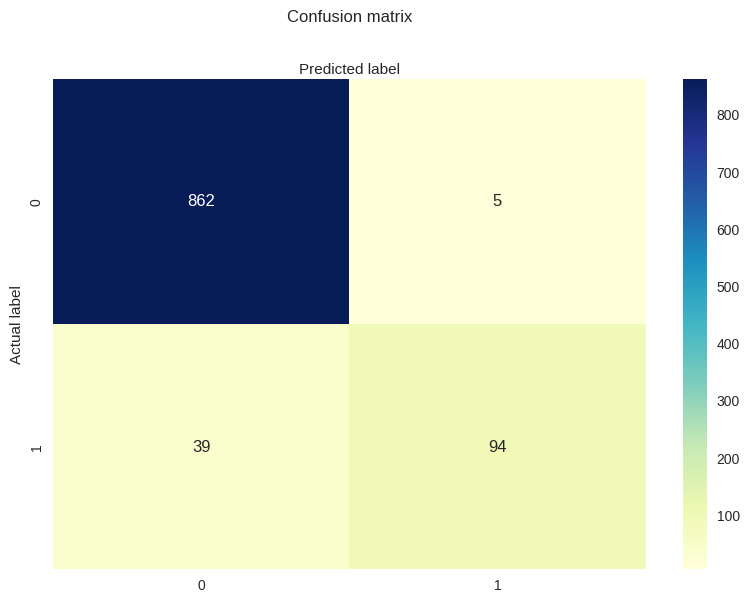

In [10]:
eval(y_test,tuned_predictions['prediction_label'])

In [11]:
!pip install autogluon.tabular

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.9 MB/s eta 0:00:00


In [12]:
result = pd.concat([X_train, y_train], axis=1)
result

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1069,22,510,0,1,0,160.4,108,27.27,218.1,88,18.54,192.9,115,8.68,12.5,4,3.38,1,0
1582,86,510,0,1,0,150.5,92,25.59,120.3,95,10.23,271.2,96,12.20,9.0,2,2.43,1,0
2444,121,415,0,0,31,263.1,70,44.73,279.3,118,23.74,127.1,143,5.72,9.7,4,2.62,5,0
3196,124,510,0,1,0,169.3,108,28.78,178.6,91,15.18,242.3,82,10.90,12.2,3,3.29,1,0
267,119,408,0,1,0,138.3,89,23.51,170.5,78,14.49,263.9,98,11.88,13.5,6,3.65,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,21,415,0,1,0,146.0,78,24.82,109.7,79,9.32,247.4,108,11.13,6.8,7,1.84,0,0
1414,182,415,0,1,0,176.1,90,29.94,174.9,106,14.87,234.7,134,10.56,9.7,4,2.62,1,0
2191,113,415,0,1,0,90.6,130,15.40,170.6,100,14.50,137.4,74,6.18,5.4,9,1.46,1,0
3313,127,408,0,1,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,0


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
predictor= TabularPredictor(label ='Churn').fit(train_data =result, verbosity = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20250402_084417"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.54 GB / 12.67 GB (83.1%)
Disk Space Avail:   69.53 GB / 107.72 GB (64.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

Accuracy: 0.953
Precision: 0.9387755102040817
Recall: 0.6917293233082706


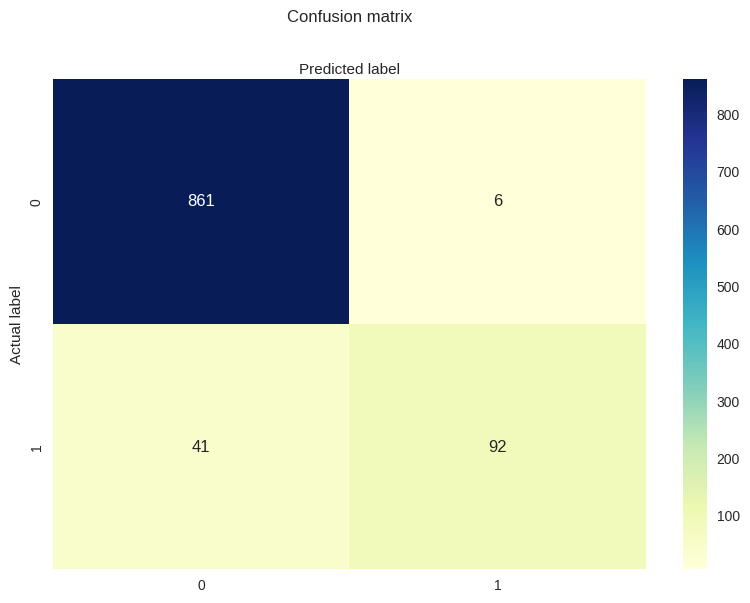

In [14]:
y_pred = predictor.predict(X_test)
#y_pred=pd.DataFrame(y_pred,columns=['stroke'])
eval(y_test,y_pred)

In [15]:
predictor.leaderboard(result, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.994428,0.972163,accuracy,0.196465,0.132524,5.017745,0.006394,0.000888,0.079048,2,True,12
1,LightGBM,0.993571,0.967880,accuracy,0.037856,0.013982,2.182142,0.037856,0.013982,2.182142,1,True,4
2,RandomForestGini,0.992285,0.961456,accuracy,0.116932,0.154502,4.729037,0.116932,0.154502,4.729037,1,True,5
3,LightGBMLarge,0.991856,0.959315,accuracy,0.030571,0.002898,1.861409,0.030571,0.002898,1.861409,1,True,11
4,RandomForestEntr,0.990999,0.955032,accuracy,0.110978,0.089229,3.315211,0.110978,0.089229,3.315211,1,True,6
5,ExtraTreesGini,0.986284,0.931478,accuracy,0.135829,0.109050,1.634151,0.135829,0.109050,1.634151,1,True,7
6,ExtraTreesEntr,0.985855,0.929336,accuracy,0.141304,0.088103,0.950386,0.141304,0.088103,0.950386,1,True,8
7,LightGBMXT,0.974711,0.965739,accuracy,0.025557,0.005416,1.410354,0.025557,0.005416,1.410354,1,True,3
8,NeuralNetFastAI,0.974711,0.946467,accuracy,0.051340,0.048851,4.822639,0.051340,0.048851,4.822639,1,True,9
9,KNeighborsDist,0.974282,0.871520,accuracy,0.031382,0.010587,0.011329,0.031382,0.010587,0.011329,1,True,2


In [16]:
predictor.feature_importance(data=result)

Computing feature importance via permutation shuffling for 18 features using 2333 rows with 5 shuffle sets...
	21.24s	= Expected runtime (4.25s per shuffle set)
	9.99s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Total day minutes,0.116331,0.005023,4.159148e-07,5,0.126672,0.105989
Customer service calls,0.060694,0.003645,1.552815e-06,5,0.068199,0.053190
International plan,0.052550,0.002340,4.704405e-07,5,0.057368,0.047733
Total eve minutes,0.049464,0.002135,4.151297e-07,5,0.053859,0.045069
Total intl minutes,0.027175,0.001376,7.852651e-07,5,0.030008,0.024343
Total intl calls,0.026747,0.001376,8.367334e-07,5,0.029579,0.023914
Voice mail plan,0.019203,0.003527,1.306058e-04,5,0.026464,0.011941
Total night minutes,0.012859,0.001212,9.370148e-06,5,0.015355,0.010363
Total night calls,0.008573,0.001250,5.268576e-05,5,0.011146,0.006000
Account length,0.005658,0.001067,1.449907e-04,5,0.007856,0.003460


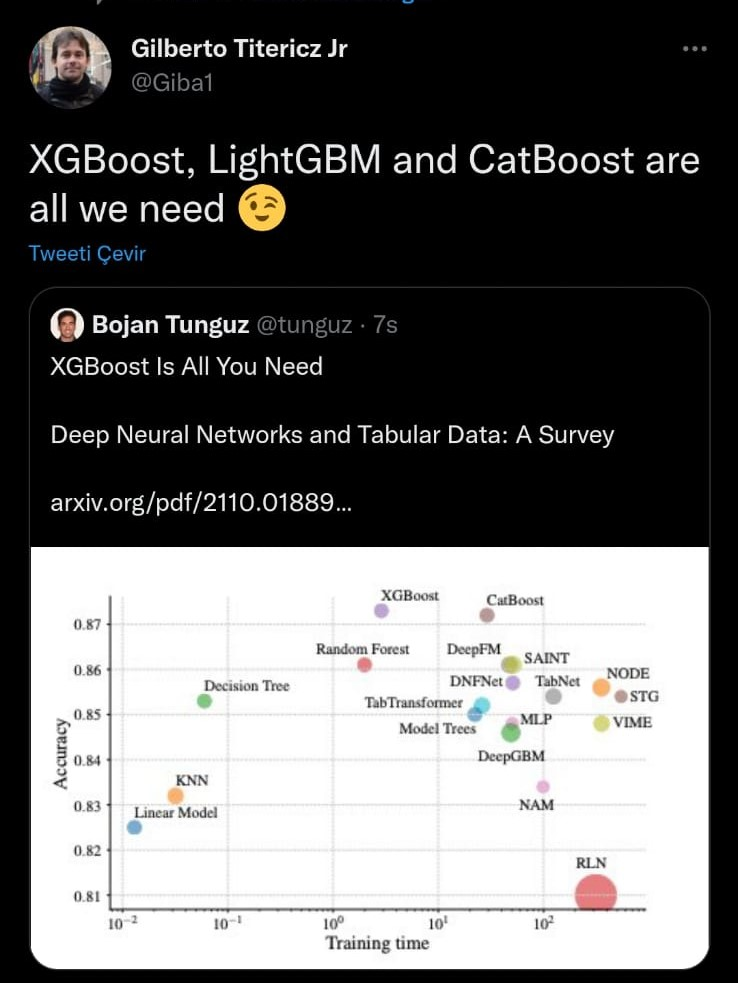

For further reference:

https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
